# Práctica 1 de la asignatura de Tipología y ciclo de vida de los datos

## Web Scraping
## Máster en Ciencia de Datos
## Oscar Javier Bachiller Sandoval

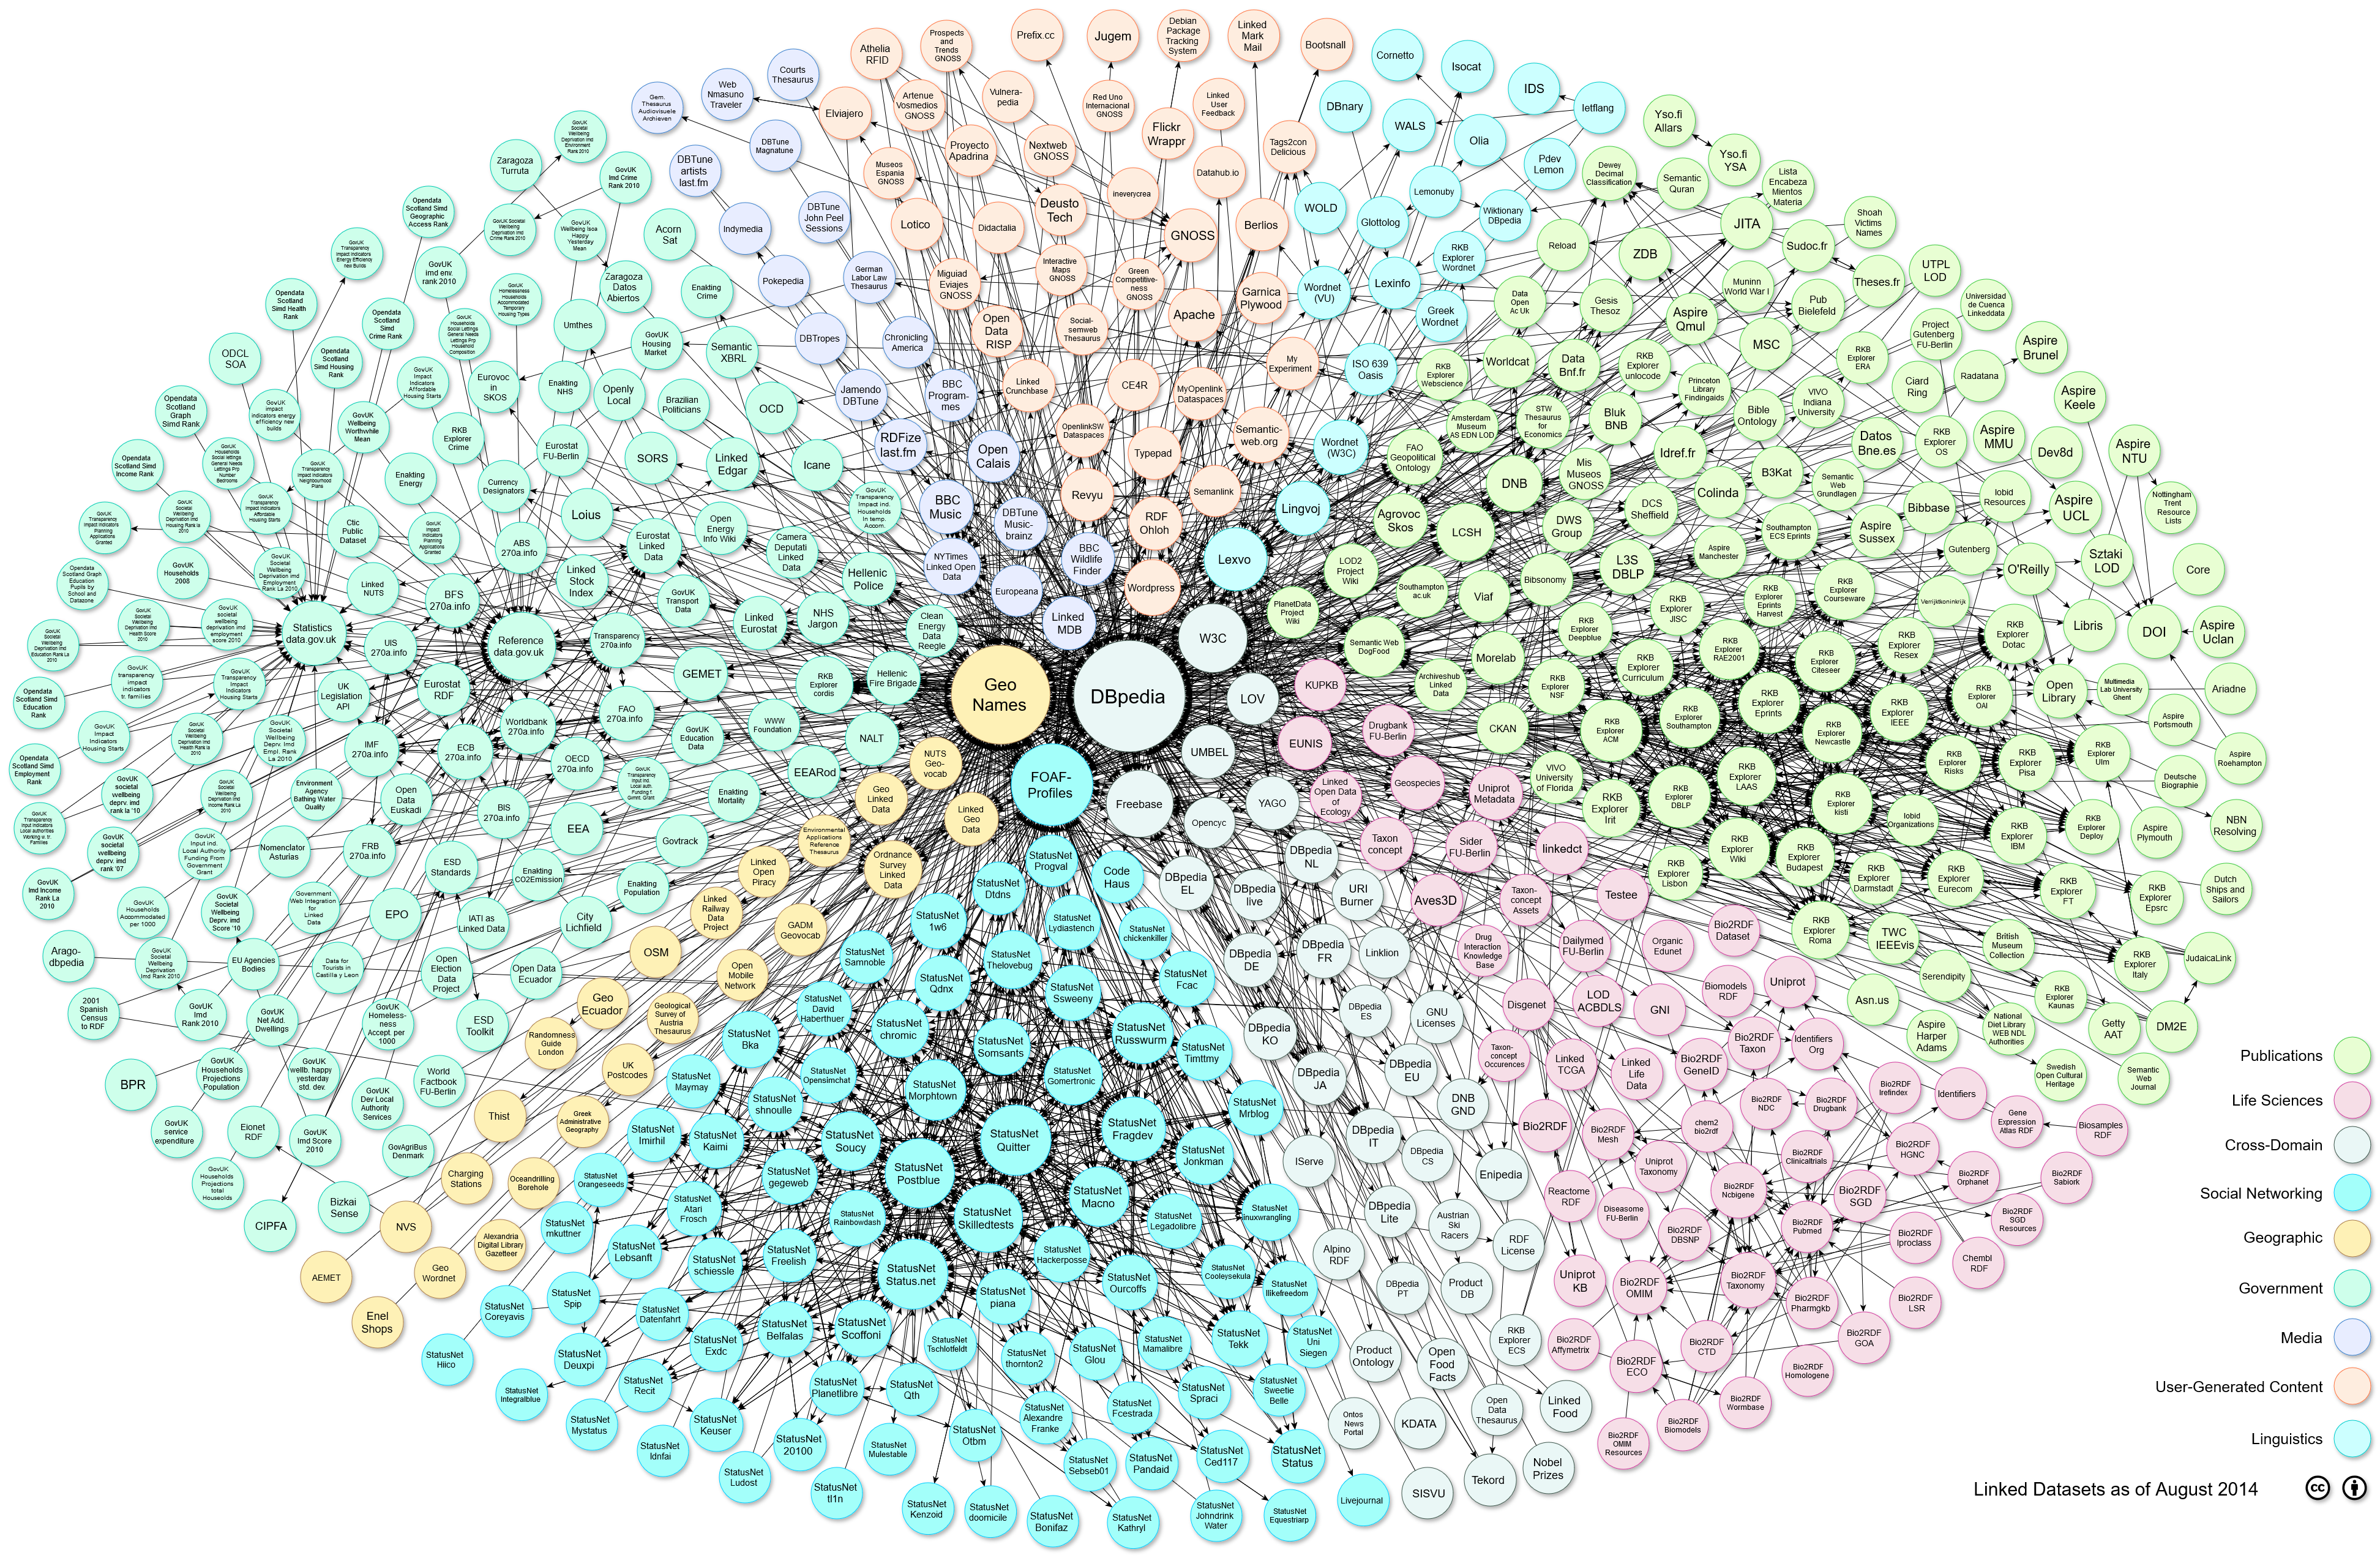

## Importación de librerías-paquetes necesarios para realizar Web Scraping

In [1]:
#BeautifulSoup para acceder de manera más sencilla al contenido HTML
from bs4 import BeautifulSoup 

In [2]:
#Requests para de una manera más facil establecer un entorno de comunicación con el sitio Web por medio del protocolo HTTP
import requests
#Pandas para convertir por medio de un formato tabular el contenido resultado de Scraping a un archivo CSV
import pandas as pd
#Whois para poder determinar quién es el propietario del sitio Web
import whois
#Builtwith para determinar con qué tecnología fue creado el sitio Web
from builtwith import builtwith
#urllib para acceder y leer el contenido del archivo robots.txt. A su vez para determinar las condiciones de uso
from urllib import robotparser

## Dicccionario para almacenar uno a uno los valores extraídos del procedimiento de Web Scraping y que se establece como base para la generación del archivo de datos en Pandas

In [3]:
d = {'key':'value'}
print(d)

{'key': 'value'}


In [4]:
d['new key'] = 'new_value'
print(d)

{'key': 'value', 'new key': 'new_value'}


## Acceso, respuesta y almacenamiento de los datos del Sitio Web

In [5]:
url = "https://learning-analytics.info/journals/index.php/JLA/issue/view/452"

In [6]:
respuesta = requests.get(url)
respuesta

<Response [200]>

In [7]:
datos = respuesta.text
datos

'\n<!DOCTYPE html>\n<html lang="en-US" xml:lang="en-US">\n<head>\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n\t<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, minimum-scale=1, user-scalable=no" />\n\n\t<link type="text/css" rel="stylesheet" href="//epress.lib.uts.edu.au/sites/epress.lib.uts.edu.au/files/resources/epress2013/epress/https/all.css?v=8.17" media="all" />\n\t<link type="text/css" rel="stylesheet" href="//epress.lib.uts.edu.au/sites/epress.lib.uts.edu.au/themes/epress2013/css/print.css?v=8.17" media="print" />\n\n\t<!--[if gte IE 9]><!-->\n\t\t<style type="text/css" media="all and (min-width: 740px) and (min-device-width: 740px), (max-device-width: 800px) and (min-width: 740px) and (orientation:landscape)">\n\t\t@import url("//epress.lib.uts.edu.au/sites/epress.lib.uts.edu.au/themes/epress2013/css/epress2013-alpha-default.css?v=8.17");\n\t\t@import url("//epress.lib.uts.edu.au/sites/epress.lib.uts.edu.au/themes

# Validación de prerequisitos


In [8]:
# Whois para determinar el propietario del sitio
print(whois.whois('learning-analytics.info'))

{
  "domain_name": [
    "LEARNING-ANALYTICS.INFO",
    "learning-analytics.info"
  ],
  "registrar": "GoDaddy.com, LLC",
  "whois_server": "whois.godaddy.com",
  "referral_url": null,
  "updated_date": [
    "2019-02-22 10:16:23",
    "2019-02-22 10:16:19"
  ],
  "creation_date": "2013-02-21 23:19:55",
  "expiration_date": "2020-02-21 23:19:55",
  "name_servers": [
    "NS1.LIB.UTS.EDU.AU",
    "NS2.LIB.UTS.EDU.AU"
  ],
  "status": [
    "clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited",
    "clientRenewProhibited https://icann.org/epp#clientRenewProhibited",
    "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
    "clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited",
    "clientTransferProhibited http://www.icann.org/epp#clientTransferProhibited",
    "clientUpdateProhibited http://www.icann.org/epp#clientUpdateProhibited",
    "clientRenewProhibited http://www.icann.org/epp#clientRenewProhibited",
    "clientDeleteProhib

In [9]:
# se determina la tecnología base del Sitio Web
builtwith('https://learning-analytics.info')

{'javascript-frameworks': ['jQuery', 'jQuery UI'],
 'document-management-systems': ['Open Journal Systems'],
 'programming-languages': ['PHP']}

In [10]:
#Lectura y validación del archivo robots.txt
rp = robotparser.RobotFileParser()
rp.set_url('https://learning-analytics.info/robots.txt')
rp.read()
url = 'https://learning-analytics.info'
user_agent = 'BadCrawler' #prueba este agente con  base en la especificación de http://example.webscraping.com/robots.txt
rp.can_fetch(user_agent, url) #Si el valor es True significa que no hay restricción de uso

True

In [11]:
user_agent = 'GoodCrawler'#prueba este agente con  base en la especificación de http://example.webscraping.com/robots.txt
rp.can_fetch(user_agent, url)#Si el valor es True significa que no hay restricción de uso

True

# Procedimiento de Scraping

In [12]:
#Se accede al contenido obtenido del procedimiento con Requests
soup = BeautifulSoup(datos, 'html.parser')

In [13]:
soup


<!DOCTYPE html>

<html lang="en-US" xml:lang="en-US">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1, minimum-scale=1, user-scalable=no" name="viewport">
<link href="//epress.lib.uts.edu.au/sites/epress.lib.uts.edu.au/files/resources/epress2013/epress/https/all.css?v=8.17" media="all" rel="stylesheet" type="text/css"/>
<link href="//epress.lib.uts.edu.au/sites/epress.lib.uts.edu.au/themes/epress2013/css/print.css?v=8.17" media="print" rel="stylesheet" type="text/css"/>
<!--[if gte IE 9]><!-->
<style media="all and (min-width: 740px) and (min-device-width: 740px), (max-device-width: 800px) and (min-width: 740px) and (orientation:landscape)" type="text/css">
		@import url("//epress.lib.uts.edu.au/sites/epress.lib.uts.edu.au/themes/epress2013/css/epress2013-alpha-default.css?v=8.17");
		@import url("//epress.lib.uts.edu.au/sites/epress.lib.uts.edu.au/themes/epress2013/css/epress2013-alpha-def

In [14]:
npo_articulos = {} #se inicializa la estructura de datos que va a almacenar los valores encontrados 
articulos_no = 0

In [15]:
articulos = soup.find_all('table', {'class':'tocArticle'}) #Se busca en la estructura padre que contiene los valores que
articulos                                                  #corresponden con los datos a extraer acorde al sitio Web

[<table class="tocArticle">
 <tr valign="top">
 <td class="tocArticleCoverImage">
 </td>
 <td class="tocArticleTitleAuthors">
 <div class="tocTitle">
 <a href="https://learning-analytics.info/journals/index.php/JLA/article/view/6360">When Are Learning Analytics Ready and What Are They Ready For</a>
 </div>
 <div class="tocAuthors">
                                                                                     Alyssa F Wise,                                                            Simon Knight,                                                            Xavier Ochoa                                                                        </div>
 </td>
 <td class="tocArticleGalleysPages">
 <div class="tocGalleys">
 <a class="pdfDownloadLink obj_galley_link pdf" href="https://learning-analytics.info/journals/index.php/JLA/article/view/6360/7046" target="_parent">
 
 		
 	PDF
 
 	</a>
 </div>
 <div class="tocPages">
                         1–4
                     </div>
 </td>
 </tr

In [16]:
for articulo in articulos:#se crea un ciclo para que elemento a elemento recorra la porción a  analizar
    titulo = articulo.find('div', {'class':'tocTitle'}).text   #Se recorre la estructura inicial de la revista; padre del
    autor = articulo.find('div', {'class':'tocAuthors'}).text  #siguiente nivel, pero hija de la anterior
    enlace = articulo.find('a', {'':''}).get('href')
    
    articulo_enlace = requests.get(enlace)                     #Se recorre el nivel que corresponde a seguir en el enlace
    articulo_datos = articulo_enlace.text                      #estructura hijo del anterior
    articulo_soup = BeautifulSoup(articulo_datos, 'html.parser')#Se accede al contenido del nuevo nivel a partir de seguir
    articulo_resumen = articulo_soup.find('p', {'':''}).text    #el enlace
     
    
    articulos_no +=1 #se aumenta el contador en 1 hasta que culmine el recorrido
    npo_articulos[articulos_no] = [titulo,autor, enlace, articulo_resumen] #envia para almacenar cada uno de los valores
                                                                           #obtenidos en la lista 
    
    print('Titulo', titulo, '\nAutor',autor, '\n\nEnlaces', enlace, '\n\nResumen', articulo_resumen, '\n')#se imprime lo obtenido

Titulo 
When Are Learning Analytics Ready and What Are They Ready For
 
Autor 
                                                                                    Alyssa F Wise,                                                            Simon Knight,                                                            Xavier Ochoa                                                                         

Enlaces https://learning-analytics.info/journals/index.php/JLA/article/view/6360 

Resumen Learning Analytics as a field of inquiry and community is distinct in the way that it brings together in shared pursuit, the research and practice of a particular kind of educational technology. At times this relationship approaches symbiosis: the annual LAK conference offers opportunities to learn both about the latest theoretical, methodological, and technological innovations as well as challenges and effective strategies for using such innovations to support learning in real world contexts. At other time

Titulo 
Exploratory versus Explanatory Visual Learning Analytics:  Driving Teachers’ Attention through Educational Data Storytelling
 
Autor 
                                                                                    Vanessa Echeverria,                                                            Roberto Martinez-Maldonado,                                                            Simon Buckingham Shum,                                                            Katherine Chiluiza,                                                            Roger Granda,                                                            Cristina Conati                                                                         

Enlaces https://learning-analytics.info/journals/index.php/JLA/article/view/6114 

Resumen From a human-centred computing perspective, supporting the interpretation of educational dashboards and visualizations by the people intended to use them exposes critical design challenges that

Titulo 
Impact of Lecturer’s Discourse for Students’ Video Engagement: Video Learning Analytics Case Study of MOOCs
 
Autor 
                                                                                    Thushari Atapattu,                                                            Katrina Falkner                                                                         

Enlaces https://learning-analytics.info/journals/index.php/JLA/article/view/5748 

Resumen Atapattu, T., K. Falkner and H. Tarmazdi (2016). Topic-wise classification of MOOC discussions: A visual analytics approach. Proceedings of the 9th International conference on Educational Data Mining, Raleigh, NC, USA.  

Titulo 
What Constitutes an ‘Actionable Insight’ in Learning Analytics?
 
Autor 
                                                                                    Rasmus Leth Jørnø,                                                            Karsten Gynther                                                    

In [17]:
print(npo_articulos)#se imprime el contenido de la estructura de datos, para el tratamiento con Pandas

{1: ['\nWhen Are Learning Analytics Ready and What Are They Ready For\n', '\n                                                                                    Alyssa F Wise,                                                            Simon Knight,                                                            Xavier Ochoa                                                                        ', 'https://learning-analytics.info/journals/index.php/JLA/article/view/6360', 'Learning Analytics as a field of inquiry and community is distinct in the way that it brings together in shared pursuit, the research and practice of a particular kind of educational technology. At times this relationship approaches symbiosis: the annual LAK conference offers opportunities to learn both about the latest theoretical, methodological, and technological innovations as well as challenges and effective strategies for using such innovations to support learning in real world contexts. At other times, we feel pulle

# Almacenamiento en un archivo CSV

In [18]:
#Se crea el archivo de datos a partir del diccionario
npo_articulos_df = pd.DataFrame.from_dict(npo_articulos, orient = 'index', columns = ['Titulo', 'Autores','Enlaces', 'Resumen'])

In [19]:
npo_articulos_df.head() #se comprueba el encabezado del archivo de datos

Titulo  \
1  \nWhen Are Learning Analytics Ready and What A...   
2  \nThe SHEILA Framework: Informing Institutiona...   
3  \nScaling Effective Learning Strategies: Retri...   
4  \nLearn From Your (Markov) Neighbor: Coenrollm...   
5  \nTaken Together: Conceptualizing Students’ Co...   

                                             Autores  \
1  \n                                            ...   
2  \n                                            ...   
3  \n                                            ...   
4  \n                                            ...   
5  \n                                            ...   

                                             Enlaces  \
1  https://learning-analytics.info/journals/index...   
2  https://learning-analytics.info/journals/index...   
3  https://learning-analytics.info/journals/index...   
4  https://learning-analytics.info/journals/index...   
5  https://learning-analytics.info/journals/index...   

                                             Resumen  
1  Learning Analytics as a field of inquiry and c...  
2  This paper introduces a learning analytics pol...  
3                                                     
4  In this paper, we evaluate the complete underg...  
5  In this study, we develop and test four measur...

In [20]:
#se exporta el contenido del archivo de datos a un archivo con formato CSV
npo_articulos_df.to_csv('infoarticulospublicados_JOLA_scraping.csv') 

# Referencias

Jarmul, K., & Lawson, R. (2017). Python Web Scraping. Packt Publishing Ltd. Second Edition.
Vanden Broucke, S., & Baesens, B. (2018). Practical web scraping for data science: best practices and examples with Python. Apress.